In [ ]:
from scenic.simulators.carla.simulator import CarlaSimulator
from scenic.syntax.veneer import localPath
from pprint import pp
import numpy as np
from scenic.core.regions import MeshVolumeRegion
import trimesh
from realization import Realization



ModuleNotFoundError: No module named 'rulebook_benchmark'

In [2]:
MAX_STEPS = 600
realization = Realization(MAX_STEPS)
scenario = scenic.scenarioFromFile('test.scenic', params={"realization":realization}, mode2D=True)
scene, _ = scenario.generate()
simulator = CarlaSimulator(carla_map = 'Town01', map_path = localPath('../../multi_objective/maps/Town01.xodr'))
simulation = simulator.simulate(scene, maxSteps=MAX_STEPS)

MovieWriter imagemagick unavailable; using Pillow instead.


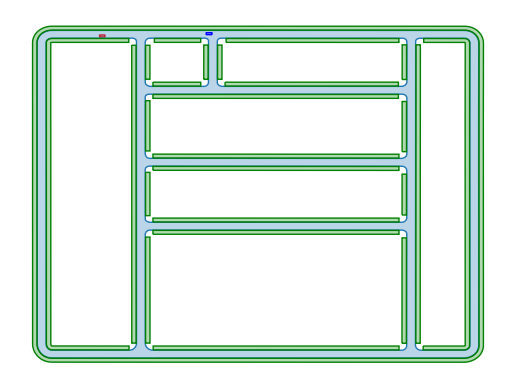

In [ ]:
import shapely

import shapely.plotting
import matplotlib.pyplot as plt
import matplotlib.animation as animation





ego = realization.get_ego()
adv = realization.get_object(1)
network = realization.network

multiplier = 5

drivable_region = network.drivableRegion
walkable_region = network.walkableRegion
def update(frame):
    ax.clear()
    frame = frame*multiplier
    
    ego_state = ego.get_state(frame)
    
    
    ego_region = MeshVolumeRegion(mesh=ego.mesh, dimensions=ego.dimensions, rotation=ego_state.orientation, position=ego_state.position)
    
    
    shapely.plotting.plot_polygon(ego_region.boundingPolygon.polygons, ax=ax, add_points=False, color='red')    
    shapely.plotting.plot_polygon(drivable_region.polygons, ax=ax, add_points=False)
    shapely.plotting.plot_polygon(walkable_region.polygons, ax=ax, add_points=False, color='green')
    
    for adv in realization.objects_non_ego:
        adv_state = adv.get_state(frame)
        adv_region = MeshVolumeRegion(mesh=adv.mesh, dimensions=adv.dimensions, rotation=adv_state.orientation, position=adv_state.position)
        shapely.plotting.plot_polygon(adv_region.boundingPolygon.polygons, ax=ax, add_points=False, color='blue')
    ax.set_xticks([])
    ax.set_yticks([])
    #delete frame around plot
    for spine in ax.spines.values():
        spine.set_visible(False)


    
fig, ax = plt.subplots()

anim = animation.FuncAnimation(fig, update, frames=MAX_STEPS//multiplier, repeat=False)
save_path = "collision.gif"
anim.save(save_path, writer='imagemagick', fps=10)



    

In [4]:
from test_rule import rule_vru_collision, rule_vehicle_collision, rule_stay_in_drivable_area, vru_clearance_on_road, vru_clearance_off_road, vru_acknowledgement
results = [rule_vru_collision(realization), rule_vehicle_collision(realization), rule_stay_in_drivable_area(realization), vru_clearance_on_road(realization), vru_clearance_off_road(realization), vru_acknowledgement(realization)]

max_violations = [x[0] for x in results]
violation_histories = [x[1] for x in results]

print("Max violations: ", max_violations)
print("Violation histories: ", violation_histories)

Max violations:  [0, 0, 0, 0, 0, 0]
Violation histories:  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

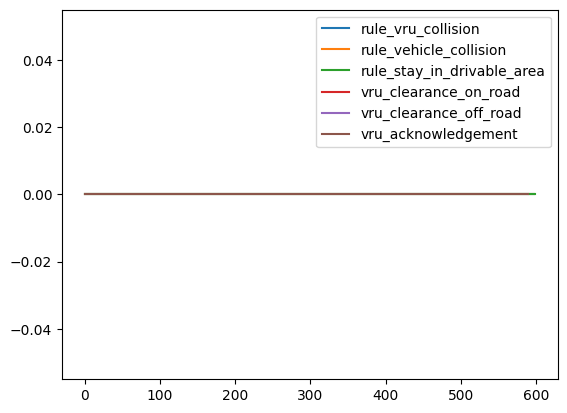

In [5]:
for history in violation_histories:
    plt.plot(history)
plt.legend(["rule_vru_collision", "rule_vehicle_collision", "rule_stay_in_drivable_area", "vru_clearance_on_road", "vru_clearance_off_road", "vru_acknowledgement"])
plt.savefig("violation_histories.png")
plt.show()
